In [64]:
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
# Setup splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [66]:
html = browser.html
tables = pd.read_html(url)
tables

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [67]:
df = tables[0]
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [68]:
df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [69]:
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [70]:
df = df.reset_index(drop=True)
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [71]:
# Answer the following question: How many months exist on Mars?
months_mars = df['month'].nunique()
print(f"{months_mars} months exist on Mars")


12 months exist on Mars


In [72]:
# Answer the following question: How many Martian (and not Earth) days worth of data exist in the scraped dataset?

days= df['terrestrial_date'].nunique()
print(f"There are {days} Martian days worth of data in the scrapped dataset") 

There are 1867 Martian days worth of data in the scrapped dataset


In [73]:
# Answer the following question: What are the coldest and the warmest months on Mars (at the location of Curiosity)?  
# Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.

monthly_df = df.groupby('month').agg({'min_temp':['mean']})
monthly_df


,min_temp
,mean
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979


In [74]:
monthly_df.columns=['min_temp']

monthly_df = monthly_df.reset_index()

monthly_df

,month,min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


In [75]:
#Find the coldest month
coldest = monthly_df[monthly_df['min_temp'] == monthly_df['min_temp'].min()]
coldest

,month,min_temp
2,3,-83.307292


In [76]:
#Find the warmest month
warmest = monthly_df[monthly_df['min_temp'] == monthly_df['min_temp'].max()]
warmest

,month,min_temp
7,8,-68.382979


<AxesSubplot:>

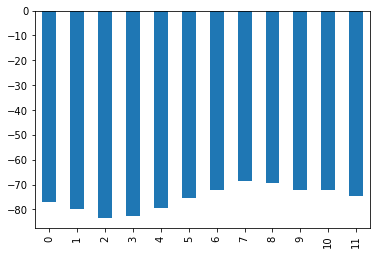

In [84]:
monthly_df['min_temp'].plot.bar()


In [78]:
# Answer the following question: Which months have the lowest and the highest atmospheric pressure on Mars? 
# Get the answer by averaging the daily atmospheric pressure of all the months. 
# Plot the results as a bar chart.

pressure_month = df.groupby('month')
pressure = pressure_month[['pressure']].mean()

pressure_month
pressure


,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


In [79]:
#Find the lowest atmospheric pressure
low_pressure = pressure[pressure['pressure'] == pressure['pressure'].min()]
low_pressure

,pressure
month,
6,745.054422


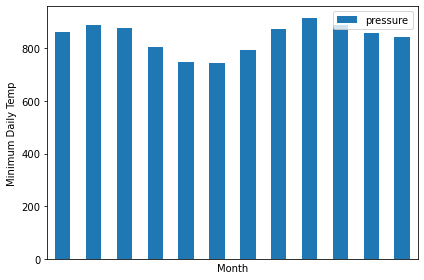

In [80]:
pressure.plot(kind='bar')
plt.ylabel('Minimum Daily Temp')
plt.xlabel('Month')
plt.xticks([])
plt.tight_layout()
plt.show()

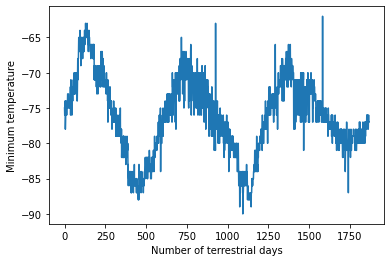

In [82]:
# Answer the following question: About how many terrestrial (Earth) days exist in a Martian year?
# That is, in the time that Mars circles the Sun once, how many days elapse on Earth? 
# Visually estimate the result by plotting the daily minimum temperature.

df['min_temp'].plot()
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')
plt.show()

In [83]:
# Export the DataFrame to a CSV file.

df.to_csv('mars_temp_data.csv', index=False)